<a href="https://colab.research.google.com/github/Shreya-259/An_evolved_Fuzzy_CMeans_algorithm_for_clustering_and_identifying_cancer_cells/blob/main/MAINLY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Xie-Beni Index for train data: 192367.9215002845
Xie-Beni Index for test data: 667182.5173297402
Fukuyama-Sugeno Index for train data: [[57427498.50262624]]
Fukuyama-Sugeno Index for test data: [[58259577.66020686]]
*****FUZZY C MEANS**********  


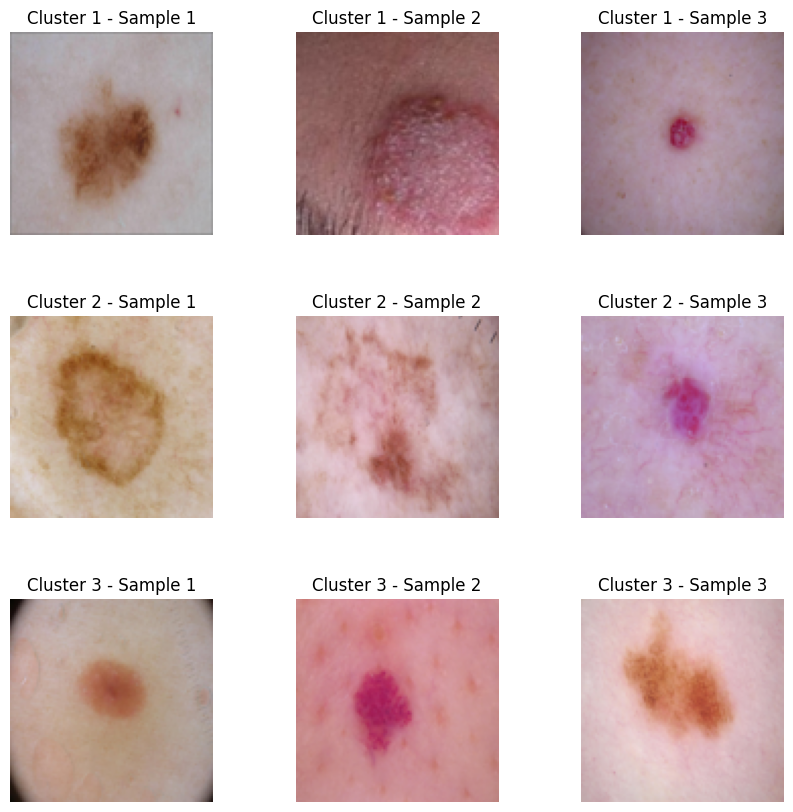

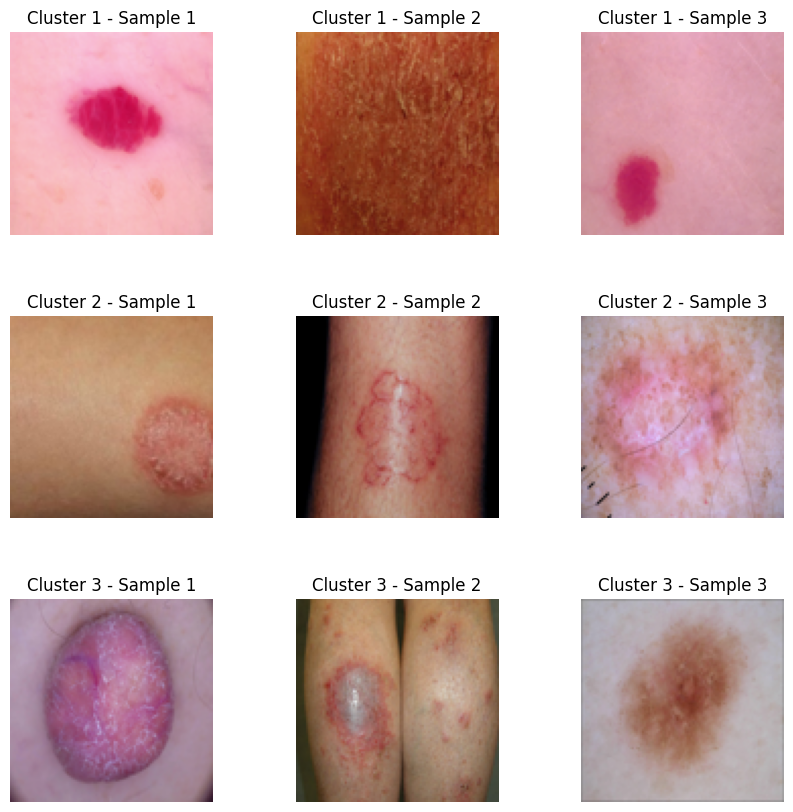

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances

# Define the FCM algorithm
def fuzzy_c_means(data, num_clusters, m=2, max_iterations=100, tol=1e-4):
    num_samples = data.shape[0]
    num_features = data.shape[1]

    # Initialize cluster centers randomly
    cluster_centers = np.random.rand(num_clusters, num_features)

    for _ in range(max_iterations):
        # Calculate distances
        distances = euclidean_distances(data, cluster_centers) ** 2

        # Calculate membership matrix
        membership_matrix = 1 / np.sum((data[:, np.newaxis] - cluster_centers) ** 2 / distances[:, :, np.newaxis], axis=2) ** (1 / (m - 1))
        membership_matrix /= np.sum(membership_matrix, axis=1)[:, np.newaxis]

        # Update cluster centers
        new_cluster_centers = np.dot(membership_matrix.T ** m, data) / np.sum(membership_matrix.T ** m, axis=1)[:, np.newaxis]

        # Check for convergence
        if np.linalg.norm(new_cluster_centers - cluster_centers) < tol:
            break

        cluster_centers = new_cluster_centers

    # Calculate Xie-Beni index
    xie_beni_index = calculate_xie_beni_index(data, cluster_centers, membership_matrix)

    # Calculate Fukuyama-Sugeno index
    fs_index = calculate_fukuyama_sugeno_index(data, cluster_centers, np.argmax(membership_matrix, axis=1))

    return cluster_centers, membership_matrix, xie_beni_index, fs_index

# Preprocessing function to resize and preprocess images
def preprocess_images(image_paths, image_size=(100, 100)):
    preprocessed_images = []
    for path in image_paths:
        image = Image.open(path)
        image = image.resize(image_size)  # Resize image to a fixed size
        preprocessed_images.append(np.array(image))
    return np.array(preprocessed_images)

def calculate_xie_beni_index(data, cluster_centers, membership_matrix):
    num_samples = data.shape[0]
    num_clusters = cluster_centers.shape[0]
    distances = euclidean_distances(data, cluster_centers) ** 2
    numerator = np.sum((distances ** 2) * membership_matrix)
    denominator = num_samples * np.sum((data - np.mean(data, axis=0)) ** 2)
    xie_beni_index = numerator / denominator
    return xie_beni_index

# Define the Fukuyama-Sugeno index calculation function
def calculate_fukuyama_sugeno_index(data, cluster_centers, cluster_labels):
    num_samples = data.shape[0]
    num_clusters = len(cluster_centers)

    # Calculate the Fukuyama-Sugeno index
    fs_index = 0
    for i in range(num_samples):
        min_distance = float('inf')
        for j in range(num_clusters):
            if cluster_labels[i] == j:
                distance = euclidean_distances(data[i].reshape(1, -1), cluster_centers[j].reshape(1, -1)) ** 2
                if distance < min_distance:
                    min_distance = distance
        fs_index += min_distance

    fs_index /= num_samples
    return fs_index

# Define the dataset paths
train_dataset_path = '/content/drive/MyDrive/modified fuzzy /train'
test_dataset_path = '/content/drive/MyDrive/modified fuzzy /test'

# Load images from train dataset directory
train_images = []
for filename in os.listdir(train_dataset_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image file
        image_path = os.path.join(train_dataset_path, filename)
        train_images.append(image_path)

# Load images from test dataset directory
test_images = []
for filename in os.listdir(test_dataset_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image file
        image_path = os.path.join(test_dataset_path, filename)
        test_images.append(image_path)

# Preprocess train images
preprocessed_train_images = preprocess_images(train_images)

# Preprocess test images
preprocessed_test_images = preprocess_images(test_images)

# Apply FCM algorithm to train data
num_clusters = 3  # Number of clusters
m = 2  # Fuzziness parameter
max_iterations = 100  # Maximum number of iterations

train_data = preprocessed_train_images.reshape(-1, np.prod(preprocessed_train_images.shape[1:]))
test_data = preprocessed_test_images.reshape(-1, np.prod(preprocessed_test_images.shape[1:]))


# Calculate Xie-Beni index for train data
cluster_centers_train, membership_matrix_train, xie_beni_train, fs_train = fuzzy_c_means(train_data, num_clusters, m, max_iterations)

# Calculate Xie-Beni index for test data
cluster_centers_test, membership_matrix_test, xie_beni_test, fs_test = fuzzy_c_means(test_data, num_clusters, m, max_iterations)


print("Xie-Beni Index for train data:", xie_beni_train)
print("Xie-Beni Index for test data:", xie_beni_test)
print("Fukuyama-Sugeno Index for train data:", fs_train)
print("Fukuyama-Sugeno Index for test data:", fs_test)
print("*****FUZZY C MEANS**********  ")


import matplotlib.pyplot as plt

# Define a function to display sample clustering images
def display_sample_cluster_images(data, cluster_centers, membership_matrix, num_clusters, num_samples=3):
    cluster_indices = np.argmax(membership_matrix, axis=1)

    # Create subplots for each cluster
    fig, axs = plt.subplots(num_clusters, num_samples, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(num_clusters):
        cluster_data = data[cluster_indices == i]
        sample_indices = np.random.choice(cluster_data.shape[0], num_samples, replace=False)
        for j, idx in enumerate(sample_indices):
            axs[i, j].imshow(cluster_data[idx].reshape(100, 100, 3))  # Assuming images are RGB
            axs[i, j].set_title(f"Cluster {i+1} - Sample {j+1}")
            axs[i, j].axis('off')

# Display sample clustering images for train data


display_sample_cluster_images(preprocessed_train_images, cluster_centers_train, membership_matrix_train, num_clusters)

# Display sample clustering images for test data

display_sample_cluster_images(preprocessed_test_images, cluster_centers_test, membership_matrix_test, num_clusters)

plt.show()


Xie-Beni Index for train data: 0.00015654316556770064
Xie-Beni Index for test data: 0.00029352952406018885
Fukuyama-Sugeno Index for train data: [[0.0071736]]
Fukuyama-Sugeno Index for test data: [[0.02762431]]
*****FUZZY C MEANS with LLE**********  


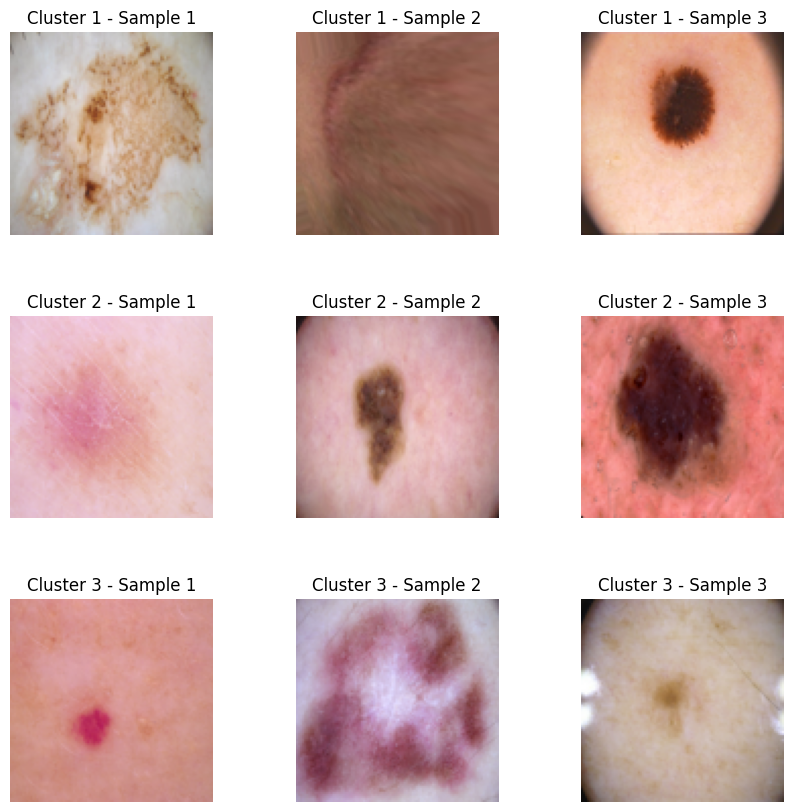

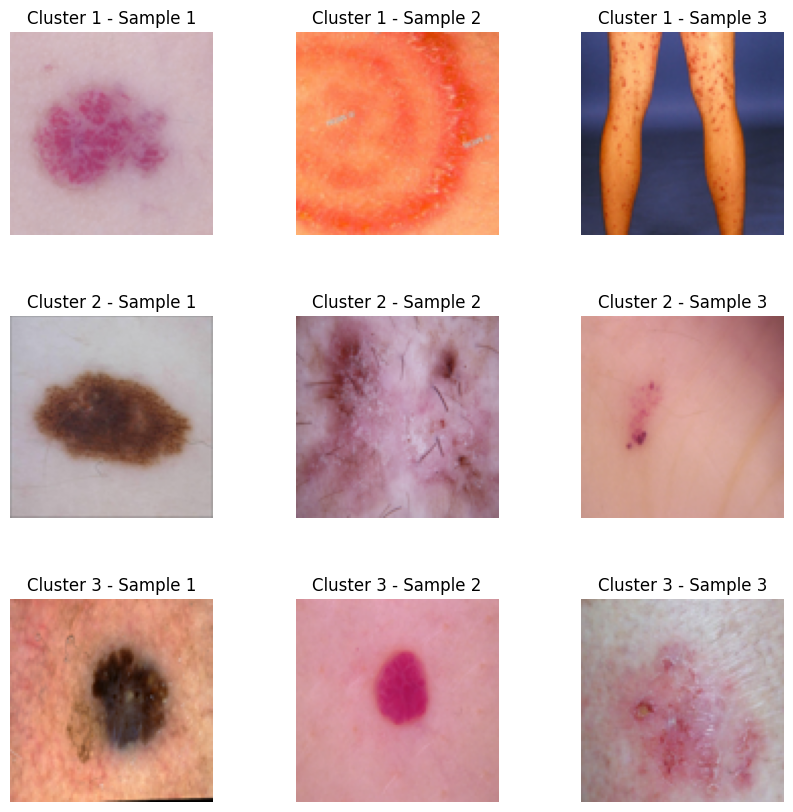

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import LocallyLinearEmbedding

# Define the FCM algorithm with LLE
def fuzzy_c_means_with_lle(data, num_clusters, m=2, max_iterations=100, tol=1e-4, lle_num_components=2, lle_num_neighbors=5):
    # Apply Locally Linear Embedding (LLE) algorithm to reduce dimensionality
    lle = LocallyLinearEmbedding(n_components=lle_num_components, n_neighbors=lle_num_neighbors)
    embedded_data = lle.fit_transform(data)

    # Initialize cluster centers using the embedded data
    cluster_centers = np.random.rand(num_clusters, lle_num_components)

    for _ in range(max_iterations):
        # Calculate distances
        distances = euclidean_distances(embedded_data, cluster_centers) ** 2

        # Calculate membership matrix
        membership_matrix = 1 / np.sum((embedded_data[:, np.newaxis] - cluster_centers) ** 2 / distances[:, :, np.newaxis], axis=2) ** (1 / (m - 1))
        membership_matrix /= np.sum(membership_matrix, axis=1)[:, np.newaxis]

        # Update cluster centers
        new_cluster_centers = np.dot(membership_matrix.T ** m, embedded_data) / np.sum(membership_matrix.T ** m, axis=1)[:, np.newaxis]

        # Check for convergence
        if np.linalg.norm(new_cluster_centers - cluster_centers) < tol:
            break

        cluster_centers = new_cluster_centers

    # Calculate Xie-Beni index
    xie_beni_index = calculate_xie_beni_index(embedded_data, cluster_centers, membership_matrix)

    # Calculate Fukuyama-Sugeno index
    fs_index = calculate_fukuyama_sugeno_index(embedded_data, cluster_centers, np.argmax(membership_matrix, axis=1))

    return cluster_centers, membership_matrix, xie_beni_index, fs_index

# Preprocessing function to resize and preprocess images
def preprocess_images(image_paths, image_size=(100, 100)):
    preprocessed_images = []
    for path in image_paths:
        image = Image.open(path)
        image = image.resize(image_size)  # Resize image to a fixed size
        preprocessed_images.append(np.array(image))
    return np.array(preprocessed_images)

def calculate_xie_beni_index(data, cluster_centers, membership_matrix):
    num_samples = data.shape[0]
    num_clusters = cluster_centers.shape[0]
    distances = euclidean_distances(data, cluster_centers) ** 2
    numerator = np.sum((distances ** 2) * membership_matrix)
    denominator = num_samples * np.sum((data - np.mean(data, axis=0)) ** 2)
    xie_beni_index = numerator / denominator
    return xie_beni_index

# Define the Fukuyama-Sugeno index calculation function
def calculate_fukuyama_sugeno_index(data, cluster_centers, cluster_labels):
    num_samples = data.shape[0]
    num_clusters = len(cluster_centers)

    # Calculate the Fukuyama-Sugeno index
    fs_index = 0
    for i in range(num_samples):
        min_distance = float('inf')
        for j in range(num_clusters):
            if cluster_labels[i] == j:
                distance = euclidean_distances(data[i].reshape(1, -1), cluster_centers[j].reshape(1, -1)) ** 2
                if distance < min_distance:
                    min_distance = distance
        fs_index += min_distance

    fs_index /= num_samples
    return fs_index

# Define the dataset paths
train_dataset_path = '/content/drive/MyDrive/modified fuzzy /train'
test_dataset_path = '/content/drive/MyDrive/modified fuzzy /test'

# Load images from train dataset directory
train_images = []
for filename in os.listdir(train_dataset_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image file
        image_path = os.path.join(train_dataset_path, filename)
        train_images.append(image_path)

# Load images from test dataset directory
test_images = []
for filename in os.listdir(test_dataset_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image file
        image_path = os.path.join(test_dataset_path, filename)
        test_images.append(image_path)

# Preprocess train images
preprocessed_train_images = preprocess_images(train_images)

# Preprocess test images
preprocessed_test_images = preprocess_images(test_images)

# Apply FCM algorithm with LLE to train data
num_clusters = 3  # Number of clusters
m = 2  # Fuzziness parameter
max_iterations = 100  # Maximum number of iterations
lle_num_components = 2  # Number of components after LLE
lle_num_neighbors = 5  # Number of neighbors for LLE

train_data = preprocessed_train_images.reshape(-1, np.prod(preprocessed_train_images.shape[1:]))
test_data = preprocessed_test_images.reshape(-1, np.prod(preprocessed_test_images.shape[1:]))


# Calculate Xie-Beni index for train data
cluster_centers_train, membership_matrix_train, xie_beni_train, fs_train = fuzzy_c_means_with_lle(train_data, num_clusters, m, max_iterations, lle_num_components, lle_num_neighbors)

# Calculate Xie-Beni index for test data
cluster_centers_test, membership_matrix_test, xie_beni_test, fs_test = fuzzy_c_means_with_lle(test_data, num_clusters, m, max_iterations, lle_num_components, lle_num_neighbors)


print("Xie-Beni Index for train data:", xie_beni_train)
print("Xie-Beni Index for test data:", xie_beni_test)
print("Fukuyama-Sugeno Index for train data:", fs_train)
print("Fukuyama-Sugeno Index for test data:", fs_test)
print("*****FUZZY C MEANS with LLE**********  ")

import matplotlib.pyplot as plt

# Define a function to display sample clustering images
def display_sample_cluster_images(data, cluster_centers, membership_matrix, num_clusters, num_samples=3):
    cluster_indices = np.argmax(membership_matrix, axis=1)

    # Create subplots for each cluster
    fig, axs = plt.subplots(num_clusters, num_samples, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(num_clusters):
        cluster_data = data[cluster_indices == i]
        sample_indices = np.random.choice(cluster_data.shape[0], num_samples, replace=False)
        for j, idx in enumerate(sample_indices):
            axs[i, j].imshow(cluster_data[idx].reshape(100, 100, 3))  # Assuming images are RGB
            axs[i, j].set_title(f"Cluster {i+1} - Sample {j+1}")
            axs[i, j].axis('off')

# Display sample clustering images for train data

display_sample_cluster_images(preprocessed_train_images, cluster_centers_train, membership_matrix_train, num_clusters)

# Display sample clustering images for test data

display_sample_cluster_images(preprocessed_test_images, cluster_centers_test, membership_matrix_test, num_clusters)

plt.show()


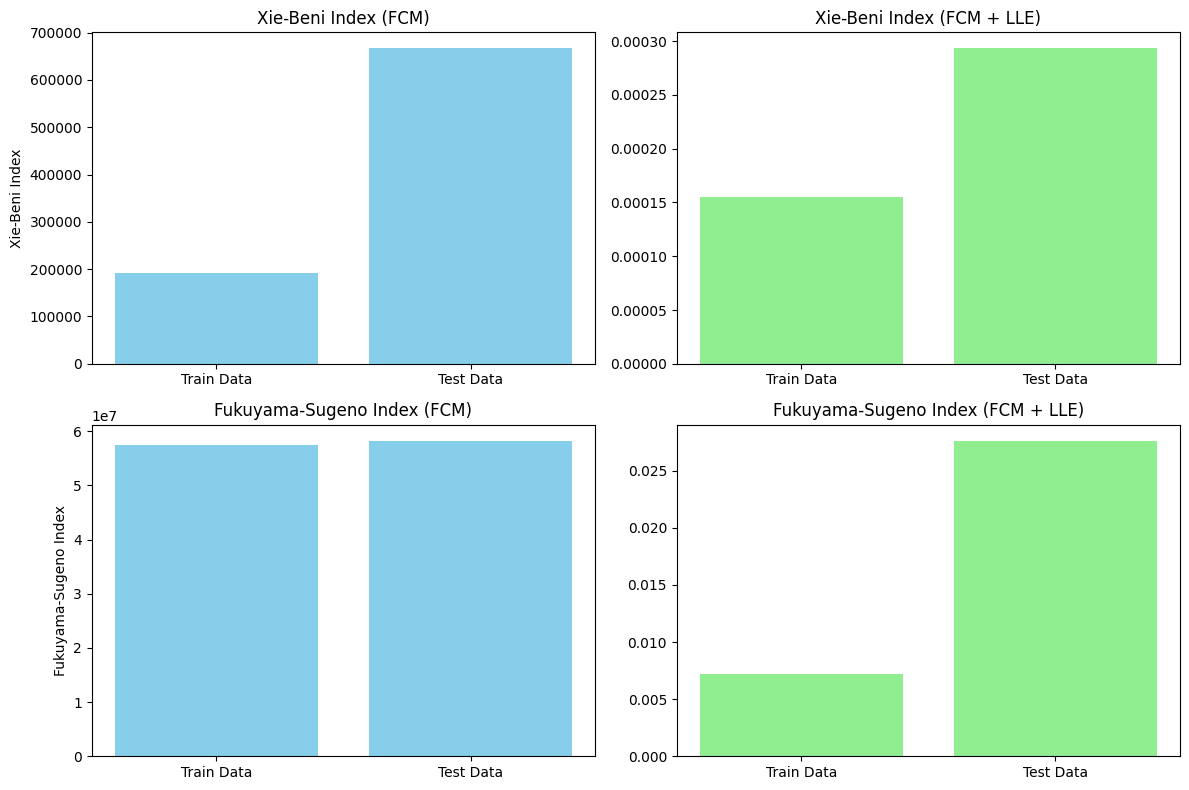

In [ ]:
import matplotlib.pyplot as plt

# Data
x_labels = ['Train Data', 'Test Data']
xie_beni_fcm = [192367.92150028443, 667182.5173297394]
xie_beni_fcm_lle = [0.00015487680245928945, 0.00029352952406018885]
fs_fcm = [57427498.50262633, 58259577.66020686]
fs_fcm_lle = [0.0071736, 0.02762431]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Xie-Beni Index
axs[0, 0].bar(x_labels, xie_beni_fcm, color='skyblue')
axs[0, 0].set_title('Xie-Beni Index (FCM)')
axs[0, 0].set_ylabel('Xie-Beni Index')

axs[0, 1].bar(x_labels, xie_beni_fcm_lle, color='lightgreen')
axs[0, 1].set_title('Xie-Beni Index (FCM + LLE)')

# Plot Fukuyama-Sugeno Index
axs[1, 0].bar(x_labels, fs_fcm, color='skyblue')
axs[1, 0].set_title('Fukuyama-Sugeno Index (FCM)')
axs[1, 0].set_ylabel('Fukuyama-Sugeno Index')

axs[1, 1].bar(x_labels, fs_fcm_lle, color='lightgreen')
axs[1, 1].set_title('Fukuyama-Sugeno Index (FCM + LLE)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


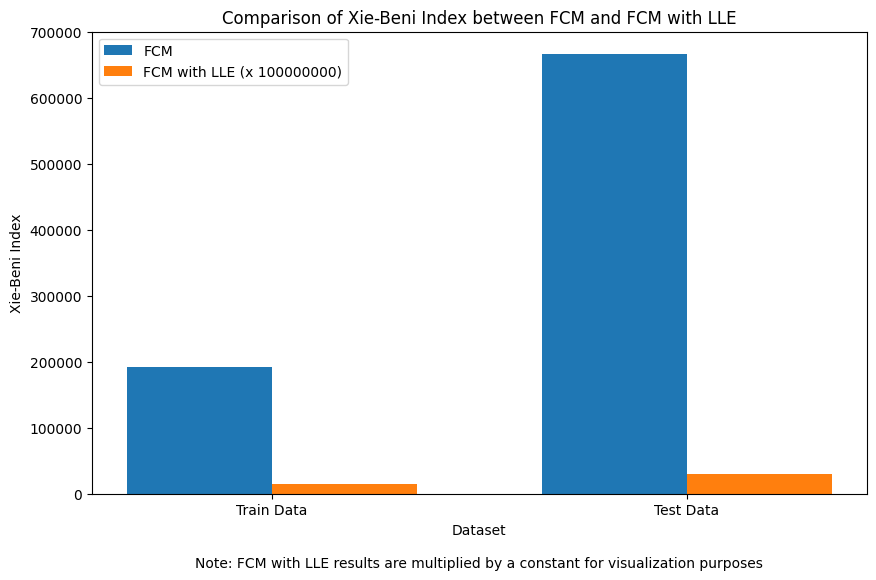

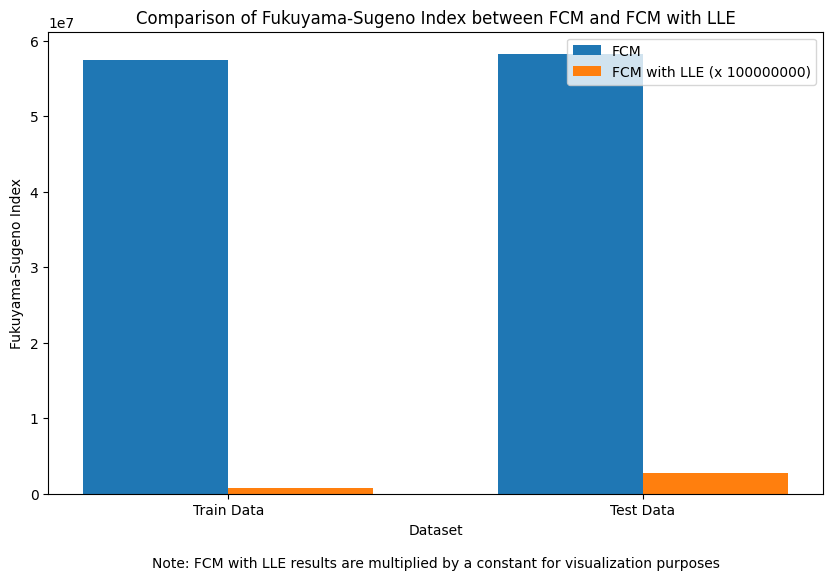

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
xie_beni_train_fcm = 192367.92150028466
xie_beni_test_fcm = 667182.5173297408
xie_beni_train_fcm_lle = 0.0001545480345424567
xie_beni_test_fcm_lle = 0.00029352952406018885

fs_train_fcm = 57427498.50262631
fs_test_fcm = 58259577.66020684
fs_train_fcm_lle = 0.0071736
fs_test_fcm_lle = 0.02762431

# Constants
K = 100000000  # Constant multiplier for FCM with LLE results

# Labels
labels = ['Train Data', 'Test Data']

# Xie-Beni Indices
xie_beni_fcm = [xie_beni_train_fcm, xie_beni_test_fcm]
xie_beni_fcm_lle = [xie_beni_train_fcm_lle * K, xie_beni_test_fcm_lle * K]

# Fukuyama-Sugeno Indices
fs_fcm = [fs_train_fcm, fs_test_fcm]
fs_fcm_lle = [fs_train_fcm_lle * K, fs_test_fcm_lle * K]

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Xie-Beni Index Comparison
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, xie_beni_fcm, width, label='FCM')
rects2 = ax.bar(x + width/2, xie_beni_fcm_lle, width, label=f'FCM with LLE (x {K})')  # Mention the constant multiplier in the label

ax.set_xlabel('Dataset')
ax.set_ylabel('Xie-Beni Index')
ax.set_title('Comparison of Xie-Beni Index between FCM and FCM with LLE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add note about the constant multiplier
ax.text(0.5, -0.15, 'Note: FCM with LLE results are multiplied by a constant for visualization purposes', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Fukuyama-Sugeno Index Comparison
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, fs_fcm, width, label='FCM')
rects2 = ax.bar(x + width/2, fs_fcm_lle, width, label=f'FCM with LLE (x {K})')  # Mention the constant multiplier in the label

ax.set_xlabel('Dataset')
ax.set_ylabel('Fukuyama-Sugeno Index')
ax.set_title('Comparison of Fukuyama-Sugeno Index between FCM and FCM with LLE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add note about the constant multiplier
ax.text(0.5, -0.15, 'Note: FCM with LLE results are multiplied by a constant for visualization purposes', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.show()
